## FNED and FPED Implementation

In [1]:
import pandas as pd
import numpy as np
import math
import os
import random 

#### Read Original Data

In [6]:
eval_dir = "imdb_using_eec_name"
# df = pd.read_csv("../data/" + eval_dir + "/test.csv", header=None, sep="\t", names=[0, 1, "mutant", "template", "gender", "label", "country"])
df = pd.read_csv("../data/" + eval_dir + "/test.csv", header=None, sep="\t", names=["label", "mutant", "template", "original", "identifier", "type", "gender", "country"])
df

,label,mutant,template,original,identifier,type,gender,country
0,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alonzo,name,male,African American
1,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Adam,name,male,African American
2,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alphonse,name,male,African American
3,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alan,name,male,African American
4,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Darnell,name,male,African American
...,...,...,...,...,...,...,...,...
151757,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Melanie,name,female,European American
151758,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Tanisha,name,female,European American
151759,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Nancy,name,female,European American
151760,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Tia,name,female,European American


In [7]:
df

,label,mutant,template,original,identifier,type,gender,country
0,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alonzo,name,male,African American
1,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Adam,name,male,African American
2,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alphonse,name,male,African American
3,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alan,name,male,African American
4,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Darnell,name,male,African American
...,...,...,...,...,...,...,...,...
151757,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Melanie,name,female,European American
151758,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Tanisha,name,female,European American
151759,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Nancy,name,female,European American
151760,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Tia,name,female,European American


#### Read Prediction Result from the Model

Make sure you set variable `ouput_dir` with the same `output_dir` in the fine-tuning parameter

In [8]:
def read_txt(fpath):
    pred = []
    file = open(fpath)
    lines = file.readlines()
    for l in lines :
        pred.append(int(l))
    file.close()
    
    return pred

In [9]:
output_dir = "eec_biasfinder"

result_dir = "../result/" + output_dir + "/"

path = result_dir + "results_data.txt"

pred = read_txt(path)

print(len(pred))

151762


In [10]:
df["prediction"] = pred
# df["label"] = df[0]

In [11]:
df.head()

,label,mutant,template,original,identifier,type,gender,country,prediction
0,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alonzo,name,male,African American,1
1,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Adam,name,male,African American,1
2,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alphonse,name,male,African American,1
3,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Alan,name,male,African American,1
4,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Darnell,name,male,African American,1


#### Group by Country

In this case, we group by `country`. You can try to group by `gender`.

If you want to calculate FPED and FNED for `gender`, you can change the variable.

In [13]:
dc = df
identifier = "gender"
dc = df.groupby(identifier)

dc.count()

,label,mutant,template,original,identifier,type,country,prediction
gender,,,,,,,,
female,75881,75881,75881,75881,75881,75881,68380,75881
male,75881,75881,75881,75881,75881,75881,68380,75881


In [14]:
print(len(dc))

identifiers = []
for k, v in dict(iter(dc)).items() :
    identifiers.append(k)

2


#### Calculate Global Performance

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = df["label"]
y_pred = df["prediction"]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.71      0.91      0.80     72290
           1       0.89      0.66      0.76     79472

    accuracy                           0.78    151762
   macro avg       0.80      0.78      0.78    151762
weighted avg       0.80      0.78      0.78    151762

[[66035  6255]
 [27344 52128]]


#### Calculate Performance for each Group

In [16]:
for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
#     print(classification_report(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)

#### Implementation

Fundamental Thery about FPR and FNR: 
https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f


Theory on FPED and FNED:
https://research.google/pubs/pub46743/ 

In [17]:
# calculate false positive rate from given consufsion matrix
def calculate_fpr(cm) :
    negative = np.sum(cm[0])
    fp = cm[0][1]
    fpr = fp / negative
    return fpr

# calculate false positive rate from given consufsion matrix
def calculate_fnr(cm) :
    negative = np.sum(cm[0])
    fn = cm[1][0]
    fnr = fn / negative
    return fnr

print(calculate_fpr(cm))
print(calculate_fnr(cm))

0.08652649052427722
0.3782542537003735


#### Calculate Global FPR and FNR

In [18]:
y_test = df["label"]
y_pred = df["prediction"]
cm = confusion_matrix(y_test, y_pred)
global_fpr = calculate_fpr(cm)
global_fnr = calculate_fnr(cm)
print("global fpr: ", global_fpr)
print("global fnr: ", global_fnr)

global fpr:  0.08652649052427722
global fnr:  0.3782542537003735


#### Calculate FPR and FNR for each Country

In [19]:
fprs = []
fnrs = []

for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
    cm = confusion_matrix(y_test, y_pred)
    fpr = calculate_fpr(cm)
    fnr = calculate_fnr(cm)
    fprs.append(round(fpr, 5))
    fnrs.append(round(fnr, 5))

In [20]:
# !pip install matplotlib --ignore-installed 

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


dfprs = pd.DataFrame(data={"identifier": identifiers, "FPR":fprs})
dfprs = dfprs.groupby("identifier").sum().sort_values(by=["FPR"],ascending=False)

dfprs.head()

,FPR
identifier,
female,0.08660
male,0.08646


Text(0, 0.5, 'FPR')

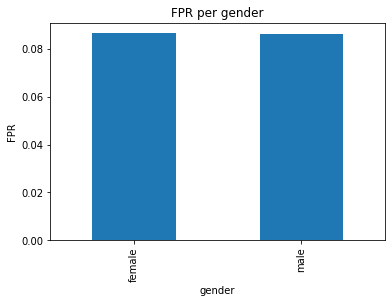

In [22]:
my_plot = dfprs.plot(kind='bar', legend=None, title="FPR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FPR")

In [23]:
dfnrs = pd.DataFrame(data={"identifier": identifiers, "FNR":fnrs})
dfnrs = dfnrs.groupby("identifier").sum().sort_values(by=["FNR"],ascending=False)

dfnrs.head()

,FNR
identifier,
female,0.38088
male,0.37563


Text(0, 0.5, 'FNR')

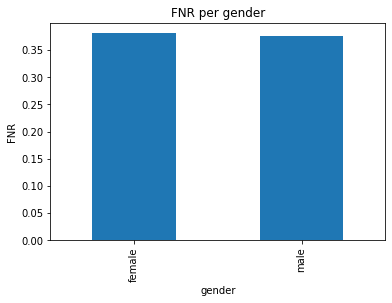

In [24]:
my_plot = dfnrs.plot(kind='bar', legend=None, title="FNR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FNR")

#### Calculate FNED and FPED

In [25]:
fped = 0
fned = 0

for _fpr, _fnr in zip(fprs, fnrs) :
    fped += abs(global_fpr - fpr)
    fned += abs(global_fnr - fnr)

print()
print("FPED: ", fped)
print("FNED: ", fned)


FPED:  0.00013833171946328604
FNED:  0.00525660533960437
